In [1]:
import pandas as pd
from sklearn.svm import SVC

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.dummy import DummyClassifier

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

In [2]:
# Read the data file
data = pd.read_csv('../data/breast-cancer.csv')
print (data.shape)

(569, 32)


In [3]:
# clean data
data = data.drop('id',axis=1) # To prepare the data for correlation
# Mapping Benign to 0 and Malignant to 1 
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})

In [4]:
y = data['diagnosis']
X = data.drop('diagnosis', axis=1)

In [5]:
from sklearn.model_selection import train_test_split

y_train, y_test,X_train, X_test = train_test_split(y,X, test_size = 0.2)

## BAGGING:

In [6]:
# Bagging modelling 
clf_bag = BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=0)

# make pipeline to make it easier
clf_bag = make_pipeline(StandardScaler(), clf_bag)
clf_bag.fit(X_train, y_train)
score = clf_bag.score(X_test, y_test)

In [7]:
pred_bag = clf_bag.predict(X_test)

In [8]:
accuracy_score(y_test, pred_bag)

0.9824561403508771

## BOOSTING:

In [9]:
# Boosting modeling
clf_boost = AdaBoostClassifier(n_estimators=100, random_state=0)

# make pipeline to make it easier
clf_boost = make_pipeline(StandardScaler(), clf_boost)
clf_boost.fit(X_train, y_train)
score = clf_boost.score(X_test, y_test)

pred_boost = clf_boost.predict(X_test)

In [10]:
accuracy_score(y_test, pred_boost)

0.956140350877193

## DUMMY:

In [11]:
clf_dummy = DummyClassifier(strategy="most_frequent", random_state=0)

# make pipeline to make it easier
clf_dummy = make_pipeline(StandardScaler(), clf_dummy)
clf_dummy.fit(X_train, y_train)
score = clf_dummy.score(X_test, y_test)

pred_dummy = clf_dummy.predict(X_test)

In [12]:
accuracy_score(y_test, pred_dummy)

0.6140350877192983

## Evaluation: ROC_AUC

<function matplotlib.pyplot.show(close=None, block=None)>

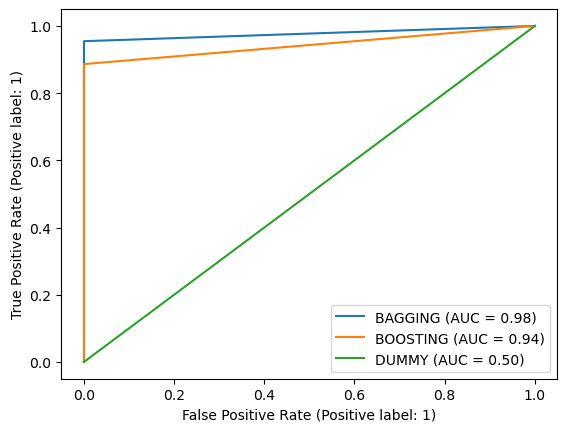

In [13]:
# Create a single plot
fig, ax = plt.subplots()

# Plot the ROC curve for BAGGING
tree_display = RocCurveDisplay.from_predictions(y_test, pred_bag, name='BAGGING', ax=ax)

# Plot the ROC curve for BOOSTING
naive_display = RocCurveDisplay.from_predictions(y_test, pred_boost, name='BOOSTING', ax=ax)

# Plot the ROC curve for DUMMY
naive_display = RocCurveDisplay.from_predictions(y_test, pred_dummy, name='DUMMY', ax=ax)

plt.show

## EXPLANATION:
### BAGGING: 
Bagging is an ensemble learning technique that combines multiple base models (classifiers) to make predictions. It involves creating several subsets of the training data through bootstrapping (random sampling with replacement). Each subset is used to train a separate base model, typically using the same learning algorithm. The final prediction is obtained by aggregating the predictions of all the base models, usually through voting or averaging. Bagging helps reduce overfitting and improve the stability and generalization of the model.
### BOOSTING: 
Boosting is another ensemble learning technique that also combines multiple base models. However, unlike bagging, boosting sequentially trains the base models in a way that each subsequent model focuses on correcting the mistakes made by the previous models. The training data is reweighted at each iteration, giving higher importance to the instances that were misclassified by the previous models. Boosting aims to create a strong predictive model by emphasizing difficult-to-classify instances. The final prediction is usually obtained by weighted voting or weighted averaging based on the performance of each base model.
### DUMMY:
Dummy classifiers are simple baselines used for comparison and evaluation of other classification models. They make predictions based on very basic rules and do not learn from the data. Dummy classifiers are often used to assess the performance of a model by comparing it against a baseline. They can make random predictions, always predict the most frequent class in the training data, or follow a simple heuristic. Dummy classifiers help determine if a predictive model is performing better than random chance or a naive rule.



### SUMMARY:
bagging and boosting are both ensemble methods that combine multiple base models, but they differ in their training approach and emphasis on instance weighting. Bagging reduces variance and enhances stability, while boosting focuses on improving accuracy by adjusting instance weights. Dummy classifiers, on the other hand, serve as basic baselines and provide a benchmark for evaluating the performance of more complex models.

### bias-variance tradeoff:
#### Bagging (Bias reduction):
Bagging primarily focuses on reducing variance rather than bias. By creating multiple subsets of the training data through bootstrapping and training separate base models, bagging aims to reduce the variance by averaging the predictions of these models. The individual base models may have high bias, but by combining them, the overall bias tends to remain similar while the variance decreases. Bagging is effective when the base models are unstable or prone to overfitting the training data.

#### Boosting (Bias and variance reduction):
Boosting, unlike bagging, addresses both bias and variance. It sequentially builds a strong model by training multiple base models, where each subsequent model corrects the mistakes made by the previous ones. By adjusting the instance weights during training, boosting assigns higher importance to misclassified instances, effectively reducing the bias. The sequential nature of boosting allows it to focus on difficult-to-classify instances and further decrease bias. Additionally, boosting also reduces variance by combining the predictions of multiple models, similar to bagging.

#### Dummy Classifiers (No bias or variance reduction):
Dummy classifiers do not directly address bias or variance reduction. They serve as simple baselines for comparison and evaluation of more complex models. Dummy classifiers typically make predictions based on random chance, the most frequent class, or a simple heuristic. They are useful for assessing whether a more sophisticated model is able to outperform these basic baselines. While dummy classifiers do not actively reduce bias or variance, they provide a reference point to evaluate the effectiveness of bias-variance trade-off in other models.


## CONCLUSION:
#### accuracy_score(y_test, pred_bag) = 0.9824
The accuracy score for bagging is 0.9824, which indicates that the bagging classifier achieved a high level of accuracy on the test set. This means that approximately 98.24% of the instances in the test set were correctly classified by the bagging model. A high accuracy score suggests that the bagging ensemble was effective in making accurate predictions on the dataset.
#### accuracy_score(y_test, pred_boost) = 0.9561
The accuracy score for boosting is 0.9561, indicating that the boosting classifier also performed well, though slightly lower than the bagging classifier. An accuracy score of 0.9561 means that approximately 95.61% of the instances in the test set were classified correctly by the boosting model. While the accuracy is slightly lower than bagging, it still suggests that the boosting model achieved a high level of accuracy on the dataset.
#### accuracy_score(y_test, pred_dummy) = 0.6140
The accuracy score for the dummy classifier is 0.6140, which is considerably lower than the bagging and boosting classifiers. An accuracy score of 0.6140 indicates that only around 61.40% of the instances in the test set were correctly classified by the dummy classifier. The low accuracy score suggests that the dummy classifier, which typically follows basic rules or random predictions, did not perform well on the given dataset compared to the more sophisticated bagging and boosting classifiers.

In summary, the accuracy scores show that both bagging and boosting achieved high accuracy on the dataset, while the dummy classifier had relatively poor performance. This suggests that bagging and boosting classifiers were more effective in making accurate predictions compared to the simple rules or random predictions of the dummy classifier.